importing dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

Loading dataset

In [2]:
fake_data=pd.read_csv("Fake.csv")
real_data=pd.read_csv("True.csv")
fake_data

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [3]:
real_data

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


Data Analysis

As we can see, there is a significant variation in the length of the articles; some are extremely short (less than 1000 characters), while others are fairly long (more than 40,000 characters). This will be something we have to consider when preparing the text.

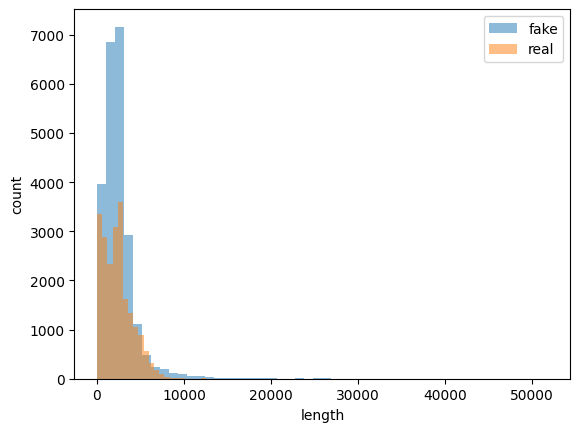

In [4]:
fake_length=fake_data["text"].apply(lambda x :len(x))
real_length=real_data["text"].apply(lambda x:len(x))
plt.hist(fake_length,bins=50,alpha=0.5,label="fake")
plt.hist(real_length,bins=50,alpha=0.5,label="real")
plt.xlabel("length")
plt.ylabel("count")
plt.legend()

In [ ]:
s=stopwords.words("English")
def get_most_common_words(texts, num_words=10):
    all_words=[]
    for text in texts:
        all_words.extend(word_tokenize(text.lower()))
    stop_words=set(s)
    words=[word for word in all_words if word.isalpha() and word not in stop_words]
    print("words--",words)
    word_counts=Counter(words)
    return word_counts.most_common(num_words)

real_word=get_most_common_words(real_data["text"])
fake_word=get_most_common_words(fake_data["text"])
print("real news contain",real_word)
print("fake news contain",fake_word)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [11]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91807\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Before we can start training our model, we need to preprocess the text data. The preprocessing steps we will perform are:

Lowercasing the text
Removing punctuation and digits
Removing stop words
Stemming or lemmatizing the text

In [12]:
stream=PorterStemmer()
lemm=WordNetLemmatizer()
def preprocess(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))
    words = word_tokenize(text)
    words = [word for word in words if word not in s]
    words = [stream.stem(word) for word in words]
    text = ' '.join(words)
    return text
real_data["text"]=real_data["text"].apply(preprocess)
fake_data["text"]=fake_data["text"].apply(preprocess)

def preprocess(text):
    text=re.sub("[^a-zA-Z]"," ",text)
    text=text.lower()
    text=text.split()
    text=[stream.stem(w) for w in text if not w in s]
    text=" ".join(text)
    return text
print(len(real_data["text"][0]))
print(len(preprocess(real_data["text"][0])))

Feature engineering: Instead of using a bag-of-words approach, we could use more advanced text representations, such as word embeddings or topic models, which may capture more nuanced relationships between words.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import scipy.sparse as sp
vectorizer=CountVectorizer()
X_real=vectorizer.fit_transform(real_data['text'])
X_fake=vectorizer.transform(fake_data['text'])
X=sp.vstack([X_real, X_fake])
y=np.concatenate([np.ones(X_real.shape[0]), np.zeros(X_fake.shape[0])])

model Bulding

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\91807\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.995025983667409
Precision: 0.996092528915286
Recall: 0.9934528448947778
F1 Score: 0.9947709357683602
